## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    return glob.glob('*/*.xlsx')


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    pattern = '.*' + s + '.*'
    regex = re.compile(pattern)
    result = list(filter(regex.match, files))
    if not result:
        return None
    else:
        return result[0]
    # result is actually a list of all the file names that match, but in our case usually there is only one match,    
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    return pd.read_excel(Q2_function(files, s), index_col = 0, header = 0)


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
functions_df
# functions_df.head(3)

,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12
2,Finished,February 10 2018 4:05 PM,February 10 2018 4:23 PM,18 mins,30,5,6,6,3.00,10.00,-,2
3,Finished,February 4 2018 4:59 PM,February 4 2018 5:16 PM,17 mins 31 secs,26,5,6,6,3.00,6.00,0.00,3
4,Finished,February 5 2018 5:20 PM,February 5 2018 5:38 PM,17 mins 59 secs,25,5,6,6,6.00,2.00,0.00,4
5,Finished,February 10 2018 9:49 PM,February 10 2018 10:07 PM,18 mins,24,5,6,6,3.00,4.00,-,5
6,Finished,February 5 2018 8:30 PM,February 5 2018 8:48 PM,18 mins,23,5,6,0,0.00,6.00,6.00,6
7,Finished,February 13 2018 4:17 AM,February 13 2018 4:35 AM,18 mins 1 sec,23,4,4,6,3.00,6.00,0.00,7
8,Finished,February 12 2018 2:19 PM,February 12 2018 2:35 PM,16 mins 44 secs,22,4,4,6,0.00,8.00,0.00,8


### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [5]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    
    names = list(dataframe.columns.values)
    
    columns = ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", 
               "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
    df_subset = dataframe.loc[:, columns]
    
    top_10 = dataframe.head(10)

    return names, df_subset, top_10


# Call the function and print the results. These results are used in subsequent questions.

names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']


In [6]:
print("Subsetted Data")
df_subset

Subsetted Data


,id,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00
0,0,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00
1,1,17 mins 54 secs,31,5,8,6,-,12.00,0.00
12,12,15 mins 44 secs,20,3,4,3,-,10.00,0.00
2,2,18 mins,30,5,6,6,3.00,10.00,-
3,3,17 mins 31 secs,26,5,6,6,3.00,6.00,0.00
4,4,17 mins 59 secs,25,5,6,6,6.00,2.00,0.00
5,5,18 mins,24,5,6,6,3.00,4.00,-
6,6,18 mins,23,5,6,0,0.00,6.00,6.00
7,7,18 mins 1 sec,23,4,4,6,3.00,6.00,0.00
8,8,16 mins 44 secs,22,4,4,6,0.00,8.00,0.00


In [7]:
print("Top 10 Rows")
top_10

Top 10 Rows


,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12
2,Finished,February 10 2018 4:05 PM,February 10 2018 4:23 PM,18 mins,30,5,6,6,3.00,10.00,-,2
3,Finished,February 4 2018 4:59 PM,February 4 2018 5:16 PM,17 mins 31 secs,26,5,6,6,3.00,6.00,0.00,3
4,Finished,February 5 2018 5:20 PM,February 5 2018 5:38 PM,17 mins 59 secs,25,5,6,6,6.00,2.00,0.00,4
5,Finished,February 10 2018 9:49 PM,February 10 2018 10:07 PM,18 mins,24,5,6,6,3.00,4.00,-,5
6,Finished,February 5 2018 8:30 PM,February 5 2018 8:48 PM,18 mins,23,5,6,0,0.00,6.00,6.00,6
7,Finished,February 13 2018 4:17 AM,February 13 2018 4:35 AM,18 mins 1 sec,23,4,4,6,3.00,6.00,0.00,7
8,Finished,February 12 2018 2:19 PM,February 12 2018 2:35 PM,16 mins 44 secs,22,4,4,6,0.00,8.00,0.00,8


### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [8]:
def getTime(x):
    arr = re.findall('\d+', x)
    time = int(arr[0]) * 60
    # check if we have minutes as well     
    if len(arr) == 2:
        time += int(arr[1])
        
    return time


def Q5_function(df):
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # Copy the data frame so we dont change the reference passed
    # Helps with debugging other parts
    df = df.copy()
    df.set_index('id')
    df.columns = [re.sub('\s+', '', x) for x in df.columns]
    
    if (pd.isnull(df['Timetaken']).any()) :
        df[['Timetaken']].fillna(value = 0)
    
    df['time'] = [getTime(x) for x in df['Timetaken']]
    df.drop(columns = ['Timetaken'], inplace = True)
    
    # Get the New column types     
    column_types = list(df_subset.dtypes)
    
    return column_types, df

# df_subset

# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
        

column_types
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
Q5_df

Column Datatypes
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O')]

New Update DataFrame


,id,Grade/45.00,Q.1/5.00,Q.2/10.00,Q.3/6.00,Q.4/6.00,Q.5/12.00,Q.6/6.00,time
0,0,32,5,6,6,3.00,12.00,0.00,856
1,1,31,5,8,6,-,12.00,0.00,1074
12,12,20,3,4,3,-,10.00,0.00,944
2,2,30,5,6,6,3.00,10.00,-,1080
3,3,26,5,6,6,3.00,6.00,0.00,1051
4,4,25,5,6,6,6.00,2.00,0.00,1079
5,5,24,5,6,6,3.00,4.00,-,1080
6,6,23,5,6,0,0.00,6.00,6.00,1080
7,7,23,4,4,6,3.00,6.00,0.00,1081
8,8,22,4,4,6,0.00,8.00,0.00,1004


### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [9]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    
    df = df.copy()
    
    for col in df:
        if df[col].dtype == 'O':
            # Coerce the errors so the '-' becomes NaN
            df[col] = df[col].apply(pd.to_numeric, errors = 'coerce')
            
        # Fill the NaN values with the mean of the column         
        df[col].fillna(df[col].mean().round(2), inplace = True)
        
        
    # Drop the duplicate
    df = df.loc[:, ~df.columns.duplicated()]
    
    df.loc['mean'] = df.loc[:, df.columns != 'id'].mean().round(2)
    
    df.loc['mean', 'id'] = df['id'].max() + 1
    df['id'] = df['id'].astype(int)
    return df


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
Q6_df

,id,Grade/45.00,Q.1/5.00,Q.2/10.00,Q.3/6.00,Q.4/6.00,Q.5/12.00,Q.6/6.00,time
0,0,32.00,5.00,6.00,6.00,3.00,12.00,0.00,856.00
1,1,31.00,5.00,8.00,6.00,2.05,12.00,0.00,1074.00
12,12,20.00,3.00,4.00,3.00,2.05,10.00,0.00,944.00
2,2,30.00,5.00,6.00,6.00,3.00,10.00,1.12,1080.00
3,3,26.00,5.00,6.00,6.00,3.00,6.00,0.00,1051.00
4,4,25.00,5.00,6.00,6.00,6.00,2.00,0.00,1079.00
5,5,24.00,5.00,6.00,6.00,3.00,4.00,1.12,1080.00
6,6,23.00,5.00,6.00,0.00,0.00,6.00,6.00,1080.00
7,7,23.00,4.00,4.00,6.00,3.00,6.00,0.00,1081.00
8,8,22.00,4.00,4.00,6.00,0.00,8.00,0.00,1004.00


### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [10]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    df = Q3_function(filenames, file)
    count, mean, std, min_, q1, q2, q3, max_ = df['Grade/21.00'].describe().round(2)
    return mean, std, q1, q2, q3, max_, min_

# Call the function and print the results.
mean_, std_, q1, q2, q3, max_, min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

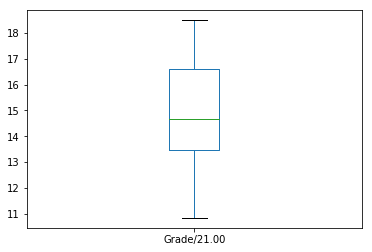

In [11]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [12]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    df = Q3_function(filenames, file)
    return df.shape
    

# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [13]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    col = 'Q.5/12.00'
    df[col] = df[col].apply(pd.to_numeric, errors = 'coerce')
    df[col].fillna(0, inplace = True)

    grouped = df.groupby(['Q.5/12.00'])['id'].apply(list)
    
    zero = grouped[min(grouped.keys())]
    maximum = len(grouped[max(grouped.keys())])
    
    return [zero, maximum]

# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [39]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    
    tuples_df = Q3_function(filenames, 'Tuples')
    taxonomy_df = Q3_function(filenames, 'Taxonomy')
    
    column_types, tuples_df = Q5_function(tuples_df)
    column_types, taxonomy_df = Q5_function(taxonomy_df)
    
    df = pd.merge(tuples_df, taxonomy_df, on = 'id', how = 'inner')
    
    df['total_score'] = df['Grade/20.00'] + df['Grade/21.00']
    max_scorer_id = df.iloc[df['total_score'].idxmax]['id']
    return df, max_scorer_id

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df, max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [40]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    
    time_in_seconds = 20 * 60
    ids = sorted(list(df.loc[df['time_x'] + df['time_y'] < time_in_seconds, ]['id']))
    return ids

# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [41]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    df = df.copy()
    # Drop the row with mean values
    df.drop(['mean'], axis = 0, inplace = True)
    # Bin
    df['binned'] = pd.cut(df['Grade/45.00'], bins = 5)
    binned_ids = df.groupby('binned')['id'].unique().apply(list)
    
    return pd.Series(binned_ids.values)
    

# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
Q13_df

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
dtype: object

### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [46]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_Q01_function(self):
        filenames = Q1_function()
        # check the number of files returned
        self.assertEqual(11, len(filenames))
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        cols_ans = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00',
       'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00',
       'Q. 6 /6.00', 'id']
        df = Q3_function(filenames, s = "Functions")
        self.assertEqual(cols_ans, list(df.columns))
        
        
    def test_Q04_function(self):
        
        cols_ans = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans = ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans = 10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):        
        column_types, df = Q5_function(df_subset)
        # Check if 'time' row is present and 'Timetaken' column is dropped
        self.assertTrue('time' in df.columns)
        self.assertFalse('Timetaken' in df.columns)
        
    def test_Q06_function(self):
        df = Q6_function(Q5_df)
        # Check if mean row is present
        self.assertTrue(df.loc['mean'] is not None)
        
        # check the id in the mean row is equal to the max(id) + 1
        mean_row_id = df.loc['mean']['id']
        
        # Drop the mean
        df.drop(['mean'], axis = 0, inplace = True)
        
        self.assertEqual(mean_row_id, df['id'].max() + 1)
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    def test_Q09_function(self):
        row, col = Q9_function(file='Exceptions')
        self.assertEqual(row, 16)
        self.assertEqual(col, 10)
        
    def test_Q10_function(self):
        zero_ids = [9, 10, 13, 17, 18]
        max_scored = 2
        zero, maximum = Q10_function(Q5_df)
        self.assertEqual(zero_ids, zero)
        self.assertEqual(max_scored, maximum)
        
    def test_Q11_function(self):
        id_of_max_scorer = 10
        Q11_df, max_scorer = Q11_function()
        self.assertEqual(max_scorer, id_of_max_scorer)
        
    def test_Q12_function(self):
        ans = [3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.085s

OK
